# Exploring the "IMDb 5000+ Movies & Multiple Genres Dataset" dataset

## Week 4: Hyperparameters-Tuning.

I have to reuse the code of the last week since it contains sepearting my dataset into sets (and other data cleaning operations). To jump to this week's progress, go down to the **Training and Evaluating on the Training Set** section, in which I did the following new tasks:

1. Fine-tuned the decision tree model, which brought down its RMSE score by ~11%.
2. Fit a random forest model.
3. Fine-tuned the random forest model, which achieved the best RMSE score so far.


Last week's dataset has only 437 instances. After working on it, we have observed that not only is the number of instances too low (thus any ML model is prone to overfitting it), but also the dataset is very clean, hence we will not have the chance to practice topics like feature selection and data cleaning.

For these reasons, we decided to choose another dataset that is larger (and less clean). 

To run this document, visit our GitHub page to get the dataset: 
https://github.com/dmml-heriot-watt/group-coursework-ha

## Load the Data

In [7]:
import os
import pandas as pd
import urllib.request
import requests

def load_movies_dataset():
    github_url = "https://raw.githubusercontent.com/dmml-heriot-watt/group-coursework-ha/rami-branch/data/IMDb_All_Genres_etf_clean1.csv?token=GHSAT0AAAAAACIDJMTWHX3SLNEQLIUB7GTEZJIAYYQ"
    requests.get(github_url)
    return pd.read_csv(github_url)

In [8]:
movies = load_movies_dataset()
movies

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


In [9]:
movies.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


Get a quick description of the dataset:

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


There are 5,562 instances in the dataset and we can notice that no row is missing from any attribute. Let us explore the non-numerical attributes. These can be divided into two types: categorical and non-categorical.

<b>We will use regression models to predict the "Total_Gross" label.</b>

Explore the categorical, non-numerical attributes:

In [11]:
movies["Censor"].value_counts()

UA           1118
A            1101
U            1023
R             926
Not Rated     495
PG-13         405
18            136
PG            120
16             71
13             53
UA 16+         22
15+            18
7              17
UA 13+         12
G               9
(Banned)        8
UA 7+           7
12+             5
All             5
Unrated         4
U/A             2
18+             2
12              1
M/PG            1
NC-17           1
Name: Censor, dtype: int64

In [12]:
movies["main_genre"].value_counts()

Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: main_genre, dtype: int64

In [13]:
movies["side_genre"].value_counts()

 Drama,  Romance       324
 Drama                 312
 Adventure,  Comedy    307
 Crime,  Drama         306
 Romance               305
                      ... 
 History,  Mystery       1
 Fantasy,  History       1
 History,  Sport         1
 Action,  Comedy         1
 Fantasy,  Musical       1
Name: side_genre, Length: 144, dtype: int64

Explore the non-categorical, non-numerical attributes:

In [14]:
movies["Movie_Title"].value_counts()

Cinderella                        3
Taxi                              3
Dracula                           3
Robin Hood                        3
The Thing                         2
                                 ..
Mank                              1
The Iceman                        1
Bleed for This                    1
Bernie                            1
Cumali Ceber: Allah Seni Alsin    1
Name: Movie_Title, Length: 5453, dtype: int64

Note that we have to eventually be careful about selecting only "unique" movie titles.

In [15]:
movies["Director"].value_counts()

Woody Allen                                                          40
Clint Eastwood                                                       32
Steven Spielberg                                                     28
Ron Howard                                                           24
Steven Soderbergh                                                    23
                                                                     ..
Directors:Mike Judge, Mike de Seve, Brian Mulroney, Yvette Kaplan     1
Directors:Aaron Blaise, Robert Walker                                 1
Stephen J. Anderson                                                   1
Directors:Byron Howard, Chris Williams                                1
Gökhan Gök                                                            1
Name: Director, Length: 2320, dtype: int64

In [16]:
movies["Actors"].value_counts()

William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan       6
Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers          4
Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving    3
Patrick Stewart, Jonathan Frakes, Brent Spiner, LeVar Burton        3
Renée Zellweger, Colin Firth, Hugh Grant, Gemma Jones               2
                                                                   ..
Robert Redford, Casey Affleck, Sissy Spacek, Danny Glover           1
Maggie Smith, Alex Jennings, Jim Broadbent, Clare Hammond           1
Emma Stone, Steve Carell, Andrea Riseborough, Sarah Silverman       1
Warren Beatty, Annette Bening, Harvey Keitel, Ben Kingsley          1
Halil Söyletmez, Doga Konakoglu, Emre Keskin, Ceyda Saltadal        1
Name: Actors, Length: 5511, dtype: int64

The 'Movie_Title' attribute will probably not affect the prediction of the target value. On the other hand, the director's name the actors' name DO contribute to the prediction. Therefore, we will have to figure out how to handle them and let the ML models understand them.

Let us get a statistical description of the dataset

In [17]:
movies.describe()

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


The count/mean/std/... of the "Year" attribute are irrelevant. It is worth noting that the mean rating is ~6.755861 and the mean runtime(minutes) is ~112.226717.

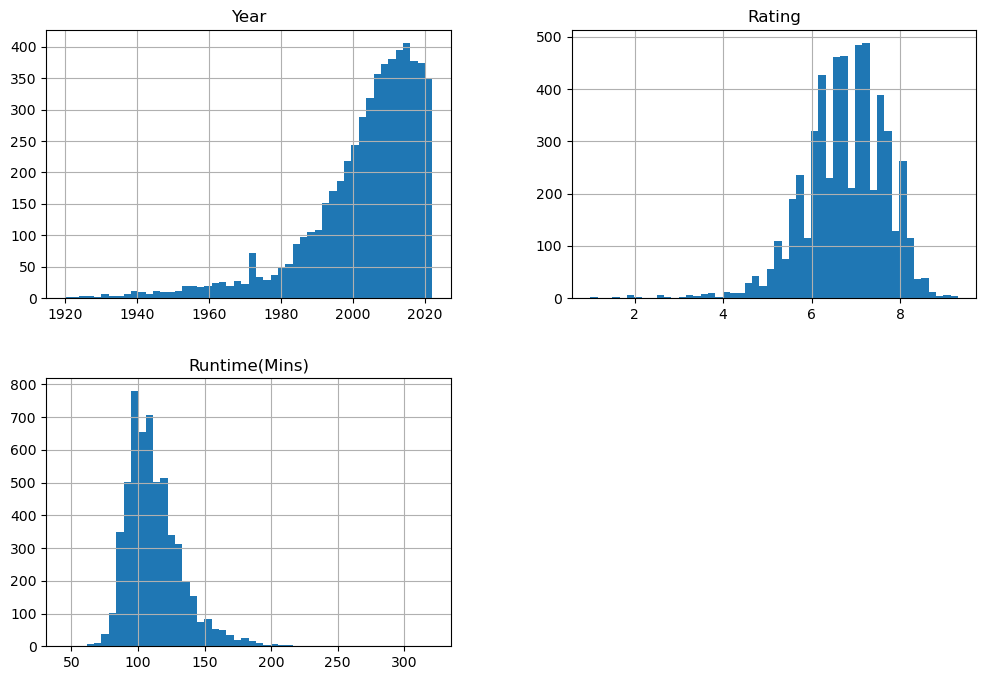

In [18]:
import matplotlib.pyplot as plt
movies.hist(bins=50, figsize=(12, 8))
plt.show()

The "Rating" and the "Runtime(Mins)" attributes are not skewed, so that will be helpful for our ML models. 

Let us explore the "Total_Gross" attribute: the label we are trying to predict.

In [19]:
movies["Total_Gross"].head()

0    Gross Unkown
1        $534.86M
2        $377.85M
3        $292.58M
4        $342.55M
Name: Total_Gross, dtype: object

In [20]:
movies["Total_Gross"].value_counts()

Gross Unkown    861
$0.01M           25
$0.02M           22
$0.04M           22
$0.03M           21
               ... 
$1.13M            1
$28.87M           1
$21.08M           1
$44.18M           1
$9.11M            1
Name: Total_Gross, Length: 3501, dtype: int64

Let us think of the target label: the "Total_Gross" attribute. 

We will use a decision tree to answer our regression problem. But, first, we have to handle the non-numeric attribute "Total_Gross" (which is our target label).

We can notice the following:
- The values of this column has the following format "$X.YZM". 
- There are 861 entries with the value "Gross Unknown".

Let us use Pandas and a Lambda function to convert the format to a float if the total gross is known and to convert that value to np.nan if the total gross = "Gross Unknown".

In [21]:
import numpy as np
movies["Total_Gross"] = movies["Total_Gross"].apply(lambda x: float(x.replace("$","").replace("M",""))*1000000 if x!="Gross Unkown" else np.nan )

Let us drop NANs:

In [22]:
movies.dropna(subset=["Total_Gross"], inplace=True)

Let us double-check that the changes have been applied:

In [23]:
movies["Total_Gross"].head()

1    534860000.0
2    377850000.0
3    292580000.0
4    342550000.0
5    315540000.0
Name: Total_Gross, dtype: float64

In [24]:
movies["Total_Gross"].value_counts()

10000.0       25
40000.0       22
20000.0       22
30000.0       21
50000.0       18
              ..
28870000.0     1
21080000.0     1
44180000.0     1
2420000.0      1
9110000.0      1
Name: Total_Gross, Length: 3500, dtype: int64

Our target label looks greate and clean!

## Create a Test Set and a Train Set

To train our model, and test its predictions, we will create a test set and a train set:

In [25]:
from sklearn.model_selection import train_test_split
train_test, test_test = train_test_split(movies, test_size=0.2, random_state=42)

## Data Visualization

Now that we have a train_set, we can start visualizing our data on that set. We should avoid touching the test_set at this stage. 

We start by making a copy of the train_test set:

In [26]:
movies = train_test.copy()

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3760 entries, 4440 to 1018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    3760 non-null   object 
 1   Year           3760 non-null   int64  
 2   Director       3760 non-null   object 
 3   Actors         3760 non-null   object 
 4   Rating         3760 non-null   float64
 5   Runtime(Mins)  3760 non-null   int64  
 6   Censor         3760 non-null   object 
 7   Total_Gross    3760 non-null   float64
 8   main_genre     3760 non-null   object 
 9   side_genre     3760 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 323.1+ KB


Let us plot the "Rating" distribution:

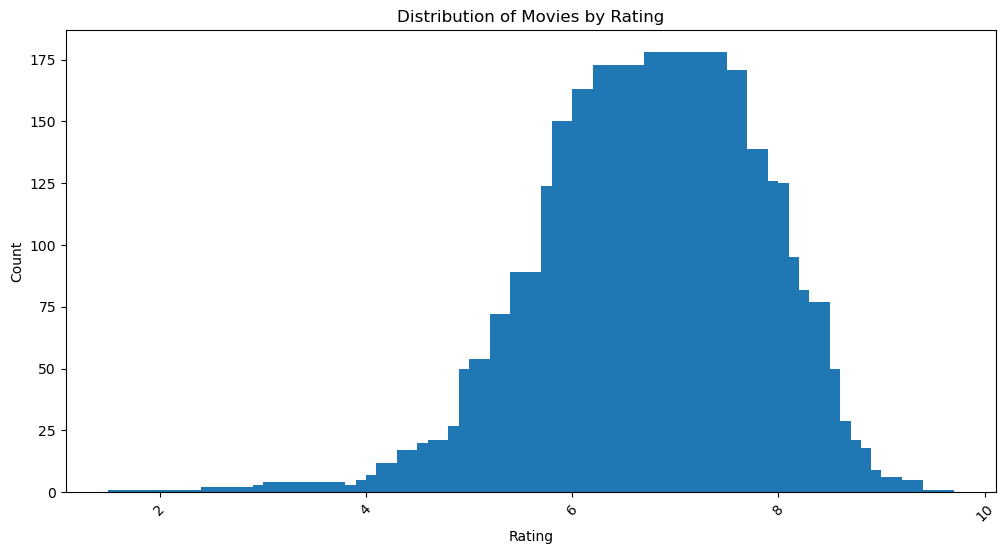

In [28]:
rating_counts = movies["Rating"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Apparently most movies range between [6.5,7.5]. Moreover, we should not blindly assume that highly rated movies [8.5-9.5] had a better performance at the Box Office (*The Shawshank Redemption*, the highest rated film on IMDb, didn't perform exceptionally well in terms of revenue) 

Let us plot the "Main_Genre" distribution:

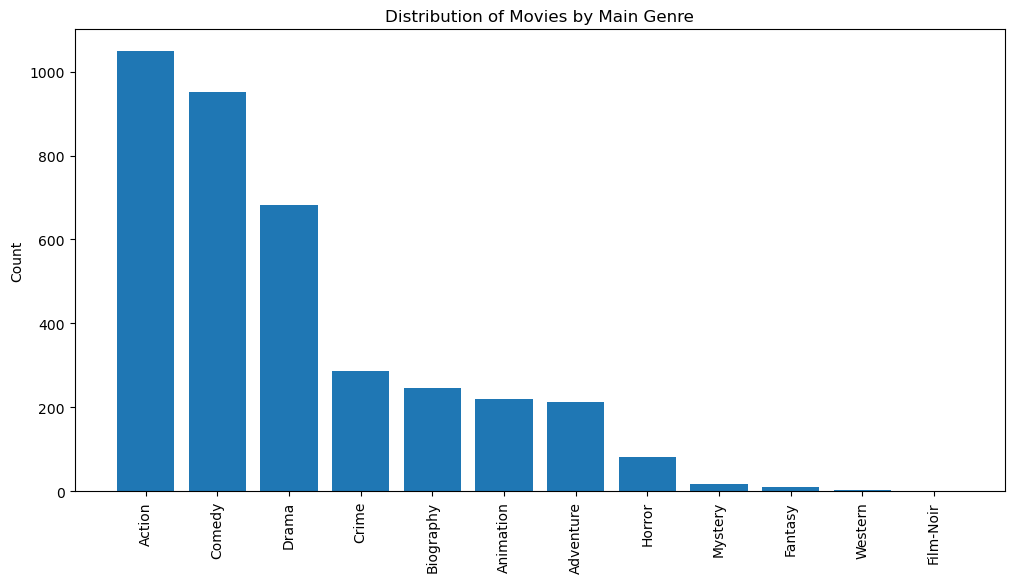

In [29]:
main_genre_counts = movies["main_genre"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(main_genre_counts.index, main_genre_counts.values)
plt.title("Distribution of Movies by Main Genre")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

*Action* movies generally have high revenue, but it is interesting to see how the rarity of *fantasy* movies in the dataset will affect our models prediction capabilites, since they also tend to perform well. The low frequency of the *fantasy* genery could also be because not many movies have it as their main genre (*Avatar* and *Star Wars* are two examples).

Let us plot the "side_genre" distribution:

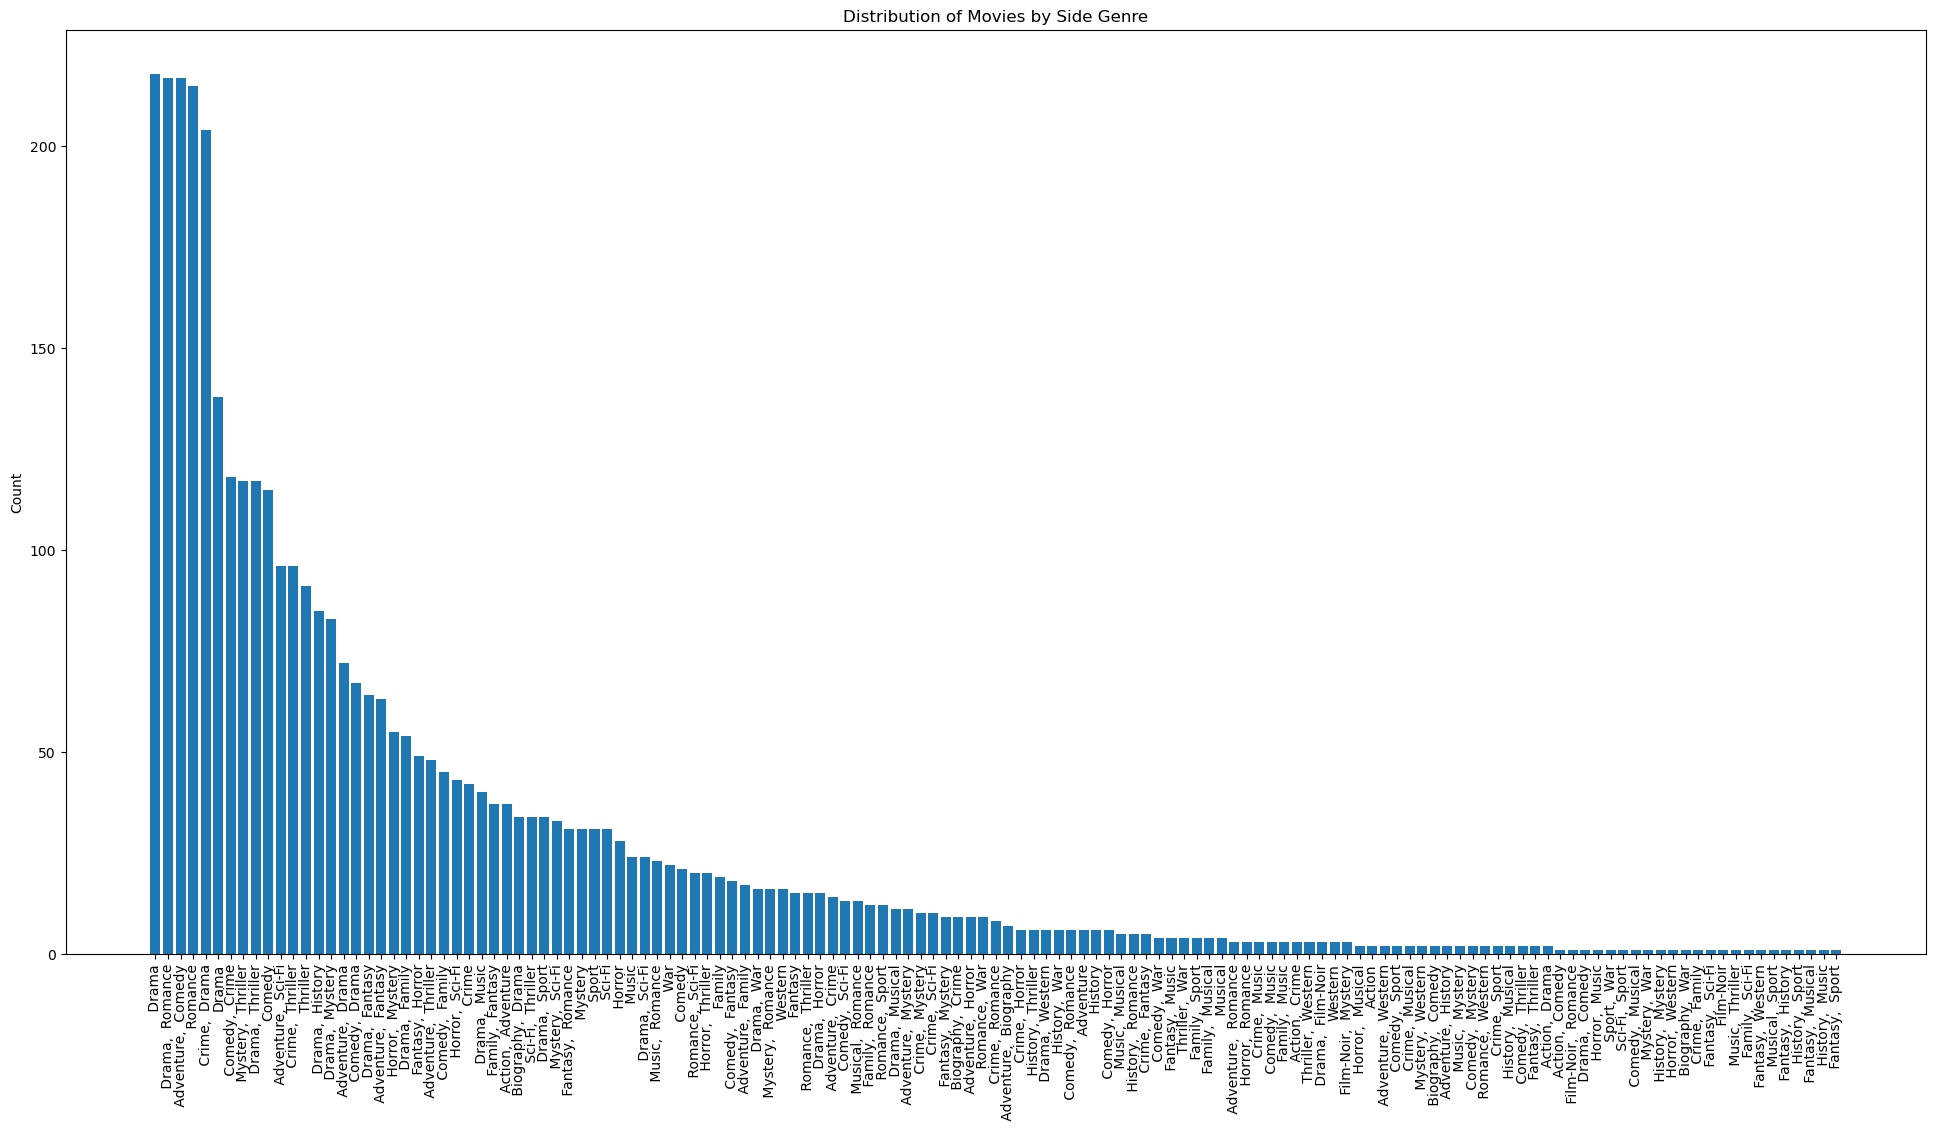

In [30]:
side_genre_counts = movies["side_genre"].value_counts()
plt.figure(figsize=(24, 12))
plt.bar(side_genre_counts.index, side_genre_counts.values)
plt.title("Distribution of Movies by Side Genre")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Observe that the two combinations: </br>
   1.  *Drama* and *Fantasy* </br>
   2.  *Fantasy* and *Adventure* </br>
are frequent, despite the rarity of *Fantasy* as a main genre.

Now, let us get some statistical information about the target label: the "Total_Gross".

In [31]:
movies["Total_Gross"].describe()

count    3.760000e+03
mean     5.298575e+07
std      7.588182e+07
min      0.000000e+00
25%      6.905000e+06
50%      3.059500e+07
75%      6.697000e+07
max      9.366600e+08
Name: Total_Gross, dtype: float64

* The mean is 52.(something)
* The standard deviation > mean, so the data is widely spread

Let us do more data visualization to compare our target label with other labels. This will help us form an intuition of which labels are important in predict our target label. The best kind of graphs to do this is a scatter plot; it will also help us identify outliers.

Scatter plot: Year vs. Total_Gross

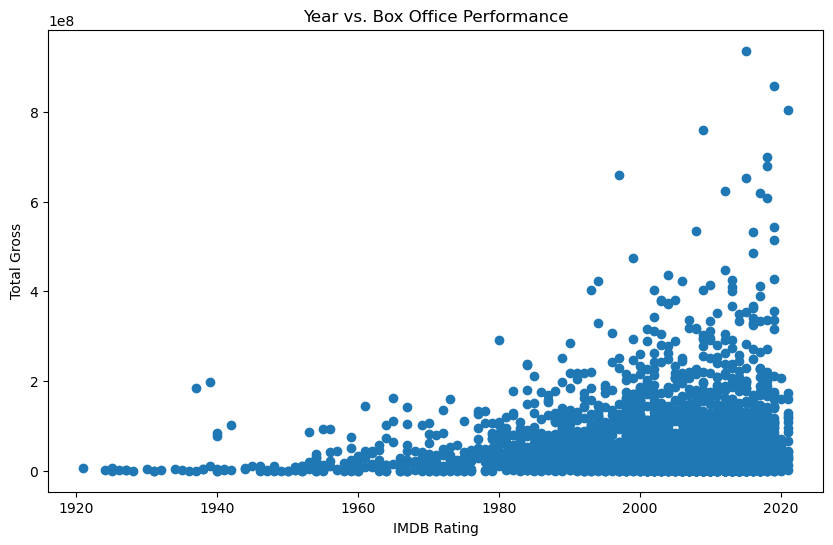

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(movies["Year"], movies["Total_Gross"])
plt.title("Year vs. Box Office Performance")
plt.xlabel("IMDB Rating")
plt.ylabel("Total Gross")
plt.show()

In 1930-1940 there are some outliers that performed well, especially if we could have our dataset adjusted for inflation.

Scatter Plot: Runtime(Mins) vs.Total_Gross 

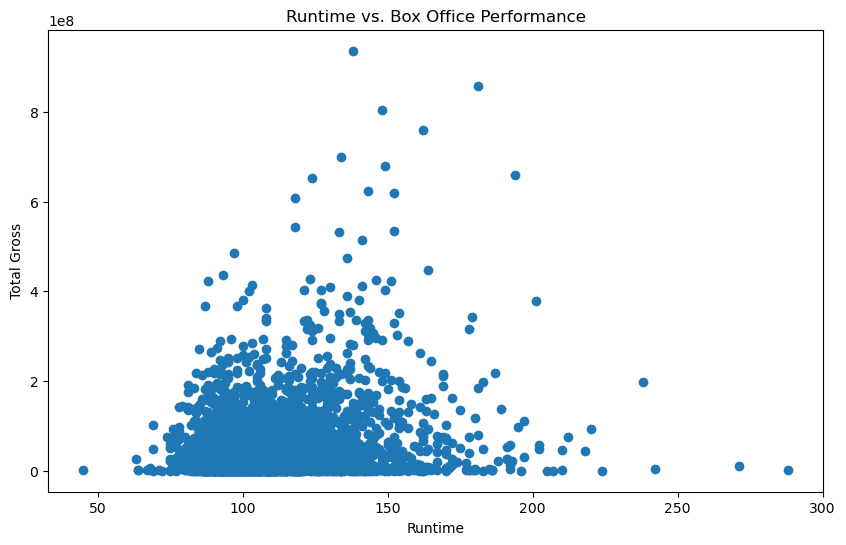

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(movies["Runtime(Mins)"], movies["Total_Gross"])
plt.title("Runtime vs. Box Office Performance")
plt.xlabel("Runtime")
plt.ylabel("Total Gross")
plt.show()

These are some interesting outliers that achieved a high total gross:

- ~180 minutes 
- ~200 minutes 
- ~140 minutes 

On the other hand, these are some interesting outliers that achieved a low total gross:
- ~45 minutes
- ~240 minutes
- ~270 minutes 
- ~290 minutes

Scatter Plot: Censor vs Total_Gross

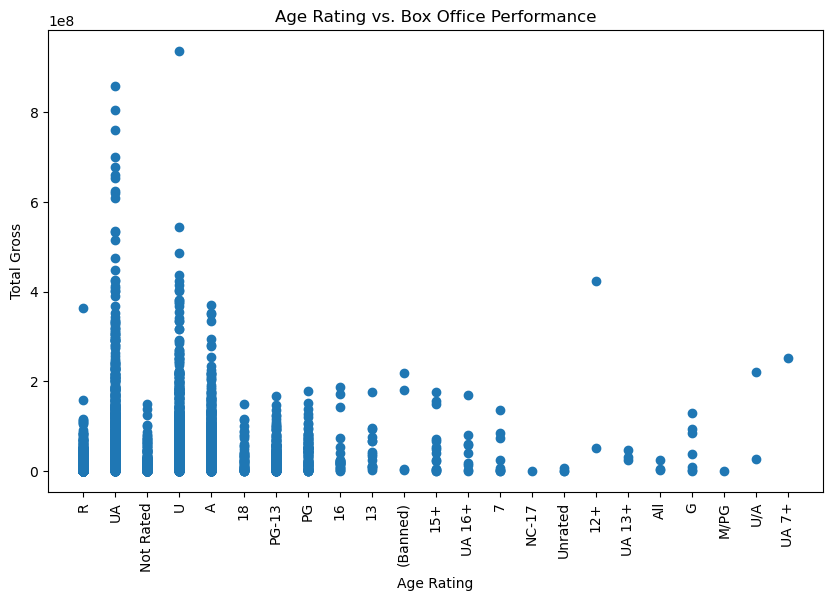

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(movies["Censor"], movies["Total_Gross"])
plt.title("Age Rating vs. Box Office Performance")
plt.xlabel("Age Rating")
plt.xticks(rotation=90)
plt.ylabel("Total Gross")
plt.show()

We note that following outliers:
- A movie rated *U* that performed well
- A movie rated *R* that performed well
- A movie rated *+12* that performed well
- Some *banned* movies that performed well compared to other in the same category

## Looking for Correlations

Let us get the correlation matrix:

In [35]:
corr_matrix = movies.corr()

C:\Users\Rami\AppData\Local\Temp\ipykernel_13392\3394929158.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movies.corr()


The correlation matrix can help us find out how much each attribute correlates with the "Total_Gross" attribute. The closer the value to 1 is, the more it is related to Total_Gross.

In [36]:
corr_matrix["Total_Gross"].sort_values(ascending=False)

Total_Gross      1.000000
Runtime(Mins)    0.172305
Year             0.100929
Rating           0.072403
Name: Total_Gross, dtype: float64

Let us plot the scatter matrix:

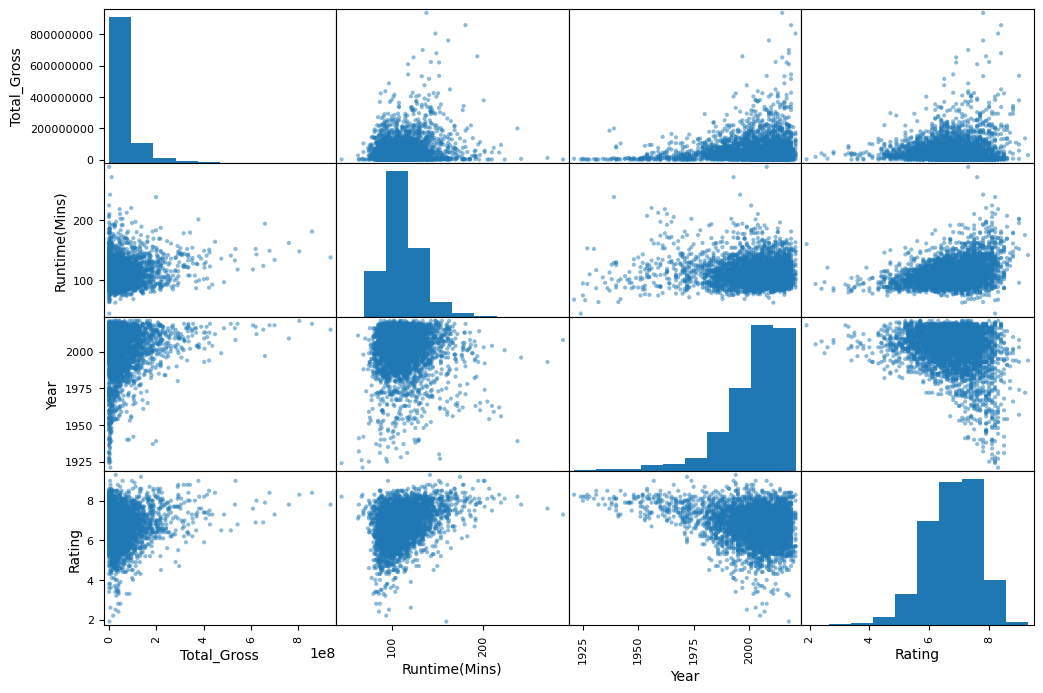

In [37]:
from pandas.plotting import scatter_matrix
attributes = ["Total_Gross", "Runtime(Mins)", "Year", "Rating"]
scatter_matrix(movies[attributes], figsize=(12, 8))
plt.show()

The most promising attribute to predict the Total_Gross from the numerical attributs is the Runtime(Mins).

## Prepare the Data for ML

Let us revert to a clean training set and separate predictors and the labels.


In [38]:
movies = train_test.drop("Total_Gross", axis=1)
movies_labels = train_test["Total_Gross"].copy()

## Data Cleaning

Let us handle text attributes.

In [39]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3760 entries, 4440 to 1018
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    3760 non-null   object 
 1   Year           3760 non-null   int64  
 2   Director       3760 non-null   object 
 3   Actors         3760 non-null   object 
 4   Rating         3760 non-null   float64
 5   Runtime(Mins)  3760 non-null   int64  
 6   Censor         3760 non-null   object 
 7   main_genre     3760 non-null   object 
 8   side_genre     3760 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 293.8+ KB


We start by handling categorical attributes:

In [40]:
movies_cat = movies[["Movie_Title","Director", "Actors", "Censor", "main_genre", "side_genre"]]
movies_cat.head(10)

,Movie_Title,Director,Actors,Censor,main_genre,side_genre
4440,Burnt,John Wells,"Bradley Cooper, Sienna Miller, Daniel Brühl, R...",R,Comedy,Drama
1676,Blow,Ted Demme,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",R,Biography,"Crime, Drama"
3908,Dear Zindagi,Gauri Shinde,"Alia Bhatt, Shah Rukh Khan, Kunal Kapoor, Priy...",UA,Drama,Romance
2210,Shane,George Stevens,"Alan Ladd, Jean Arthur, Van Heflin, Brandon De...",Not Rated,Drama,Western
4141,The Lobster,Yorgos Lanthimos,"Colin Farrell, Rachel Weisz, Jessica Barden, O...",R,Drama,"Romance, Sci-Fi"
964,Maze Runner: The Scorch Trials,Wes Ball,"Dylan O'Brien, Kaya Scodelario, Thomas Brodie-...",UA,Action,"Adventure, Sci-Fi"
748,Machete,"Directors:Ethan Maniquis, Robert Rodriguez","Danny Trejo, Michelle Rodriguez, Robert De Nir...",R,Action,"Crime, Thriller"
4296,Beaches,Garry Marshall,"Bette Midler, Barbara Hershey, John Heard, Spa...",UA,Comedy,"Drama, Music"
1403,Crocodile Dundee II,John Cornell,"Paul Hogan, Linda Kozlowski, John Meillon, Ern...",U,Action,"Adventure, Comedy"
4240,Parenthood,Ron Howard,"Steve Martin, Mary Steenburgen, Dianne Wiest, ...",A,Comedy,Drama


Let us apply a OneHotEncoder:

In [41]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
movies_cat_1hot = cat_encoder.fit_transform(movies_cat)
movies_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

And following are the categories encoded:

In [42]:
cat_encoder.categories_

[array(["'71", '*batteries not included', '10 Cloverfield Lane', ...,
        'À bout de souffle', 'Átame!', 'Æon Flux'], dtype=object),
 array(['A.R. Murugadoss', 'Aanand L. Rai', 'Aaron Sorkin', ...,
        'Zal Batmanglij', 'Zaza Urushadze', 'Zoya Akhtar'], dtype=object),
 array([' Star:Robert Redford',
        '50 Cent, Joy Bryant, Adewale Akinnuoye-Agbaje, Omar Benson Miller',
        'Aaliyah, Stuart Townsend, Marguerite Moreau, Vincent Perez', ...,
        'Zoe Saldana, Michael Vartan, Callum Blue, Jordi Mollà',
        'Zoey Deutch, James Franco, Tangie Ambrose, Cedric the Entertainer',
        'Zoey Deutch, Lucy Fry, Danila Kozlovskiy, Gabriel Byrne'],
       dtype=object),
 array(['(Banned)', '12+', '13', '15+', '16', '18', '7', 'A', 'All', 'G',
        'M/PG', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'U', 'U/A', 'UA',
        'UA 13+', 'UA 16+', 'UA 7+', 'Unrated'], dtype=object),
 array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
        'Drama', 

## The Transformation Pipeline

We will make a pipeline for the numerical and non-numerical attrbitues:

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Get the numerical attributes:

In [44]:
movies_num = movies.select_dtypes(include=[np.number])

Let us now create two lists: one list for the numerical attributes and the other list for non-numerical attributes:

In [45]:
num_attribs = list(movies_num)
cat_attribs = list(movies_cat)

In [46]:
num_attribs

['Year', 'Rating', 'Runtime(Mins)']

In [47]:
cat_attribs

['Movie_Title', 'Director', 'Actors', 'Censor', 'main_genre', 'side_genre']

The numerical pipeline:

In [48]:
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

The full pipeline:

In [49]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

The prepared movies dataset:

In [50]:
movies_prepared = full_pipeline.fit_transform(movies)

In [51]:
movies_prepared

<3760x9297 sparse matrix of type '<class 'numpy.float64'>'
	with 33840 stored elements in Compressed Sparse Row format>

## Training and Evaluating on the Training Set

Let us start by using a *linear regression* model to make predictions:

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(movies_prepared, movies_labels)

LinearRegression()

Let us investigate the predictions our first model made:

In [53]:
some_data = movies.iloc[:5]
some_labels = movies_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_reg.predict(some_data_prepared)
print("Predictions: ", predictions)
print("Labels: ", list(some_labels))

Predictions:  [13649181.50705842 52990435.9766393   1395783.28273788 20005460.18890993
  8690064.85696386]
Labels:  [13650000.0, 52990000.0, 1400000.0, 20000000.0, 8700000.0]


To evaluate our *Linear Regression* model, let us measure its RMSE on the whole training set:

In [54]:
from sklearn.metrics import mean_squared_error
movies_predictions = lin_reg.predict(movies_prepared)
lin_mse = mean_squared_error(movies_labels, movies_predictions)
lin_rmse = np.sqrt(lin_mse)
print("The MSE of the Linear Regression model = ", lin_rmse)

The MSE of the Linear Regression model =  17543.465770066283


Now, let us fit our next model, a *Decision Tree*, and using it to make prediction on our test set:

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(movies_prepared, movies_labels)

DecisionTreeRegressor()

In [56]:
movies_predictions = tree_reg.predict(movies_prepared)
tree_mse = mean_squared_error(movies_labels, movies_predictions)
tree_rmse = np.sqrt(tree_mse)
print("The MSE of the DT model = ", tree_rmse)

The MSE of the DT model =  0.0


We get an RMSE = 0 !! This means that our *Decision Tree* is **overfitting** our data. To accurately measure its performance, we have to rely on a different evaluation metric: *Cross-Validation*.

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, movies_prepared, movies_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

The following functions helps us display the *Cross-Validation* scores:

In [58]:
def display_CV_scores(scores):
    print("Scores: ", scores)
    print("Mean of scores: ", scores.mean())
    print("Standard deviation of scores: ", scores.std())

In [59]:
display_CV_scores(tree_rmse_scores)

Scores:  [69565687.2575627  69496648.61045535 77515815.09876247 67446493.07555945
 80597930.7964554  71379217.27116852 72086460.96543564 69624632.9911256
 83084606.16213463 62719465.09546858]
Mean of scores:  72351695.73241284
Standard deviation of scores:  5925123.123839043


Let us compute the *Cross-Validation* scores for *Linear Regression*:

In [60]:
lin_reg_scores = cross_val_score(lin_reg, movies_prepared, movies_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
display_CV_scores(lin_rmse_scores)

Scores:  [53630780.25779425 59229044.88147487 58240409.83215432 61324057.72234258
 58438224.67815251 74293525.09404218 65623786.52008317 58681573.14537093
 64915763.26989751 54245497.08451583]
Mean of scores:  60862266.2485828
Standard deviation of scores:  5796238.830397846


As we observe, the cross-validation scores of the linear regression model are better than those of the decision tree.

## Fine-Tune the Models

We can use Scikit-Learns's GridSearchCV to search for the best combination of hyperaparameter values. 

We will start by fine-tuning the Decision Tree model.

In [58]:
DT_reg = DecisionTreeRegressor(random_state=42) # to avoid randomness (for the sake of presenting the results)
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"splitter": ["best", "random"], "max_depth": [1, 3, 5, 7, 9]}
]
grid_search = GridSearchCV(DT_reg, param_grid, cv=5,
                               scoring="neg_mean_squared_error",
                               return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 3, 5, 7, 9],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [225]:
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 3, 5, 7, 9],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [226]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

73082506.02866098 {'max_depth': 1, 'splitter': 'best'}
73082506.02866098 {'max_depth': 1, 'splitter': 'random'}
71767569.10134307 {'max_depth': 3, 'splitter': 'best'}
70550175.63236918 {'max_depth': 3, 'splitter': 'random'}
70879905.71962601 {'max_depth': 5, 'splitter': 'best'}
71148140.78072165 {'max_depth': 5, 'splitter': 'random'}
69859779.22098514 {'max_depth': 7, 'splitter': 'best'}
69379446.33667034 {'max_depth': 7, 'splitter': 'random'}
68513417.90675463 {'max_depth': 9, 'splitter': 'best'}
68033947.60183768 {'max_depth': 9, 'splitter': 'random'}


In [227]:
grid_search.best_params_

{'max_depth': 9, 'splitter': 'random'}

The best combination of parameters are: {'max_depth': 9, 'splitter': 'random'}, which achieved an RMSE score of: 68,033,947.60183768

This is better that our older RMSE score of: **71,664,617.9957427**

Now, let us try a different set of hyperparameters:

In [228]:
param_grid = [
    {"splitter": ["best", "random"], "max_depth": [9, 10, 11, 12, 13]}
]
grid_search = GridSearchCV(DT_reg, param_grid, cv=5,
                               scoring="neg_mean_squared_error",
                               return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [9, 10, 11, 12, 13],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [229]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

68513417.90675463 {'max_depth': 9, 'splitter': 'best'}
68033947.60183768 {'max_depth': 9, 'splitter': 'random'}
71725414.30587667 {'max_depth': 10, 'splitter': 'best'}
68311749.30554815 {'max_depth': 10, 'splitter': 'random'}
70356259.46278058 {'max_depth': 11, 'splitter': 'best'}
67538212.22686718 {'max_depth': 11, 'splitter': 'random'}
70061279.74820516 {'max_depth': 12, 'splitter': 'best'}
67322966.26328233 {'max_depth': 12, 'splitter': 'random'}
69154404.06270257 {'max_depth': 13, 'splitter': 'best'}
68635134.1501062 {'max_depth': 13, 'splitter': 'random'}


In [230]:
grid_search.best_params_

{'max_depth': 12, 'splitter': 'random'}

Now we even got a better score.

The new RMSE score is: **65,973,263.20160382** for the parameters: {'max_depth': 12, 'splitter': 'random'}.

Let us try a different hyperparameters combination:

In [231]:
param_grid = [
    {"splitter": ["best", "random"], "max_depth": [10, 12, 13, 16, 19, 22], "min_samples_leaf": [5, 10]}
]
grid_search = GridSearchCV(DT_reg, param_grid, cv=5,
                               scoring="neg_mean_squared_error",
                               return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [10, 12, 13, 16, 19, 22],
                          'min_samples_leaf': [5, 10],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [232]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

65506683.411754936 {'max_depth': 10, 'min_samples_leaf': 5, 'splitter': 'best'}
64415682.706818 {'max_depth': 10, 'min_samples_leaf': 5, 'splitter': 'random'}
64261028.20028775 {'max_depth': 10, 'min_samples_leaf': 10, 'splitter': 'best'}
64528017.46628435 {'max_depth': 10, 'min_samples_leaf': 10, 'splitter': 'random'}
65622607.46357373 {'max_depth': 12, 'min_samples_leaf': 5, 'splitter': 'best'}
65379226.869709074 {'max_depth': 12, 'min_samples_leaf': 5, 'splitter': 'random'}
64052230.4267339 {'max_depth': 12, 'min_samples_leaf': 10, 'splitter': 'best'}
64500692.313691385 {'max_depth': 12, 'min_samples_leaf': 10, 'splitter': 'random'}
65448417.98971144 {'max_depth': 13, 'min_samples_leaf': 5, 'splitter': 'best'}
66063559.96693948 {'max_depth': 13, 'min_samples_leaf': 5, 'splitter': 'random'}
64351235.186224535 {'max_depth': 13, 'min_samples_leaf': 10, 'splitter': 'best'}
63609216.19738782 {'max_depth': 13, 'min_samples_leaf': 10, 'splitter': 'random'}
66489085.521864966 {'max_depth': 

In [233]:
grid_search.best_params_

{'max_depth': 13, 'min_samples_leaf': 10, 'splitter': 'random'}

The {'max_depth': 13, 'min_samples_leaf': 10, 'splitter': 'random'} combination has an RMSE score of: **63,609,216.19738782**, which is the best so far.

Let us try a different set of hyperparameters values.

In [234]:
param_grid = [
    {"splitter": ["best", "random"], "max_depth": [10, 12, 13, 16, 21], "min_samples_leaf": [5, 10, 15],  "max_leaf_nodes":[None,10,20,30]}
]
grid_search = GridSearchCV(DT_reg, param_grid, cv=5,
                               scoring="neg_mean_squared_error",
                               return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [10, 12, 13, 16, 21],
                          'max_leaf_nodes': [None, 10, 20, 30],
                          'min_samples_leaf': [5, 10, 15],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [235]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

65506683.411754936 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'splitter': 'best'}
64415682.706818 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'splitter': 'random'}
64261028.20028775 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'splitter': 'best'}
64528017.46628435 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'splitter': 'random'}
63924451.769131966 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 15, 'splitter': 'best'}
66322636.946284086 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 15, 'splitter': 'random'}
67279285.77017659 {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'splitter': 'best'}
67864549.7468552 {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'splitter': 'random'}
66592566.802569345 {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'splitter': 'best'}
67258314.15325019 {'max_depth': 10, 'max_leaf_nodes': 10, 'min_sa

In [236]:
grid_search.best_params_

{'max_depth': 13,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'splitter': 'random'}

The combination 

{'max_depth': 13,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'splitter': 'random'}

has an RMSE score similar to the last one.

Let us try one last time:

In [237]:
param_grid = [
    {"splitter": ["best", "random"],
     "max_depth": [10, 12, 13, 16, 21], 
     "min_samples_leaf": [10, 15, 20], 
     'min_samples_split': [1e-3,1.0],
     "max_leaf_nodes":[None,10]}
]
grid_search = GridSearchCV(DT_reg, param_grid, cv=5,
                               scoring="neg_mean_squared_error",
                               return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [10, 12, 13, 16, 21],
                          'max_leaf_nodes': [None, 10],
                          'min_samples_leaf': [10, 15, 20],
                          'min_samples_split': [0.001, 1.0],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [238]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

64261028.20028775 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 0.001, 'splitter': 'best'}
64528017.46628435 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 0.001, 'splitter': 'random'}
73082506.02866098 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 1.0, 'splitter': 'best'}
73082506.02866098 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 1.0, 'splitter': 'random'}
63924451.769131966 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 15, 'min_samples_split': 0.001, 'splitter': 'best'}
66322636.946284086 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 15, 'min_samples_split': 0.001, 'splitter': 'random'}
73082506.02866098 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 15, 'min_samples_split': 1.0, 'splitter': 'best'}
73082506.02866098 {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_l

In [239]:
grid_search.best_params_

{'max_depth': 13,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 0.001,
 'splitter': 'random'}

The best hypermaters combination is:
{'max_depth': 13,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 0.001,
 'splitter': 'random'},
 which yielded an RMSE score of: **63,609,216.19738782**. 
 
This is still lower than the RMSE we obtained using Linear Regression (recall that it was = 60,862,266.2485828).
 
However, we were able to bring down the RMSE of the decision tree model from 71,664,617.9957427 to 63,609,216.19738782. This is a decrease of ~11%, which is good.

Let us try a RandomForestRegressor model on our data. A random forest is a collection of decision trees.

In [6]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(movies_prepared, movies_labels)
movies_predictions = tree_reg.predict(movies_prepared)
forest_mse = mean_squared_error(movies_labels, movies_predictions)
forest_rmse = np.sqrt(forest_mse)
tree_rmse

NameError: name 'movies_prepared' is not defined

As we observe, since the RMSE = 0.0, the Random Forest regressor is overfitting the data (just like the decision tree model did).

Evaluating the random forest using cross-validation scoring:

In [241]:
forest_scores = cross_val_score(forest_reg, movies_prepared, movies_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_CV_scores(forest_rmse_scores)

Scores:  [54509204.70132481 56732508.20570114 59779511.24423063 57923217.2976008
 59516980.92639751 74912192.40922877 65714666.45659589 56755689.99564334
 64170278.44085854 55052752.26240264]
Mean of scores:  60506700.19399841
Standard deviation of scores:  5918409.912277754


Now let do hyperparameter-tuning via Grid Search on our Random Forest model:


In [242]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [243]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

75204692.8425596 {'max_features': 2, 'n_estimators': 3}
62038697.79478456 {'max_features': 2, 'n_estimators': 10}
61663695.92441406 {'max_features': 2, 'n_estimators': 30}
71135931.1959356 {'max_features': 4, 'n_estimators': 3}
64060278.17855069 {'max_features': 4, 'n_estimators': 10}
61331576.41093424 {'max_features': 4, 'n_estimators': 30}
70015847.3474493 {'max_features': 6, 'n_estimators': 3}
62846073.31418964 {'max_features': 6, 'n_estimators': 10}
60931019.41523365 {'max_features': 6, 'n_estimators': 30}
70947848.30582087 {'max_features': 8, 'n_estimators': 3}
64046934.53255215 {'max_features': 8, 'n_estimators': 10}
60433099.0285686 {'max_features': 8, 'n_estimators': 30}
70098095.78791007 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
62356519.64727727 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
69463265.98011011 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
62564160.4217329 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
691

The best combination of parameters is:

In [247]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

The RMSE score is **60,931,019.41523365**. Let us try another combination:

In [75]:
param_grid = [
 {'n_estimators': [30, 50, 70], 'max_features': [8, 10, 12]},
 {'bootstrap': [False], 'n_estimators': [30, 50, 70], 'max_features': [6, 8, 10]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 10, 12],
                          'n_estimators': [30, 50, 70]},
                         {'bootstrap': [False], 'max_features': [6, 8, 10],
                          'n_estimators': [30, 50, 70]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

61543087.93595245 {'max_features': 8, 'n_estimators': 30}
60994369.95407855 {'max_features': 8, 'n_estimators': 50}
61000360.50367271 {'max_features': 8, 'n_estimators': 70}
61393815.8699894 {'max_features': 10, 'n_estimators': 30}
61106705.41968116 {'max_features': 10, 'n_estimators': 50}
59940530.28560616 {'max_features': 10, 'n_estimators': 70}
61775132.35257311 {'max_features': 12, 'n_estimators': 30}
61038508.286962464 {'max_features': 12, 'n_estimators': 50}
61101616.60274915 {'max_features': 12, 'n_estimators': 70}
59566957.401140735 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
59525703.63581824 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}
59845756.36200383 {'bootstrap': False, 'max_features': 6, 'n_estimators': 70}
60072074.96880094 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
59451631.628033414 {'bootstrap': False, 'max_features': 8, 'n_estimators': 50}
59702200.19081762 {'bootstrap': False, 'max_features': 8, 'n_estimators': 70}
60

In [77]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 50}

Now we have an RMSE = **59,349,022.0640945**, obtained from the combination of hyperparameters: {'bootstrap': False, 'max_features': 8, 'n_estimators': 50}. This RMSE is better than the one of the Linear Regression model. 

Let us try another combination:

In [260]:
param_grid = [
 {'n_estimators': [50], 'max_features': [8, 10], 'max_depth': [400, 600]},
 {'bootstrap': [False], 'n_estimators': [50], 'max_features': [14, 18], 'max_depth': [600, 800]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [400, 600], 'max_features': [8, 10],
                          'n_estimators': [50]},
                         {'bootstrap': [False], 'max_depth': [600, 800],
                          'max_features': [14, 18], 'n_estimators': [50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [261]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 600, 'max_features': 18, 'n_estimators': 50}

In [262]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

63192960.84327922 {'max_depth': 400, 'max_features': 8, 'n_estimators': 50}
62061467.60734599 {'max_depth': 400, 'max_features': 10, 'n_estimators': 50}
61626802.0306218 {'max_depth': 600, 'max_features': 8, 'n_estimators': 50}
60754832.86928411 {'max_depth': 600, 'max_features': 10, 'n_estimators': 50}
60701652.29459769 {'bootstrap': False, 'max_depth': 600, 'max_features': 14, 'n_estimators': 50}
60115611.299178064 {'bootstrap': False, 'max_depth': 600, 'max_features': 18, 'n_estimators': 50}
60167318.300786585 {'bootstrap': False, 'max_depth': 800, 'max_features': 14, 'n_estimators': 50}
60438525.98709663 {'bootstrap': False, 'max_depth': 800, 'max_features': 18, 'n_estimators': 50}


Apparently this combination did not help.

Let us try another one:

In [64]:
from sklearn.ensemble import RandomForestRegressor
param_grid = [
 {'n_estimators': [50], 'max_features': [20, 25, 30], 'max_depth': [800, 1000, 1500]},
 {'bootstrap': [False], 'n_estimators': [50], 'max_features': [20, 25, 30], 'max_depth': [600, 800, 1000, 1500]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [800, 1000, 1500],
                          'max_features': [20, 25, 30], 'n_estimators': [50]},
                         {'bootstrap': [False],
                          'max_depth': [600, 800, 1000, 1500],
                          'max_features': [20, 25, 30], 'n_estimators': [50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

60875500.50168691 {'max_depth': 800, 'max_features': 20, 'n_estimators': 50}
61403519.77349213 {'max_depth': 800, 'max_features': 25, 'n_estimators': 50}
61454732.83148778 {'max_depth': 800, 'max_features': 30, 'n_estimators': 50}
61675614.04340774 {'max_depth': 1000, 'max_features': 20, 'n_estimators': 50}
61364383.65910497 {'max_depth': 1000, 'max_features': 25, 'n_estimators': 50}
61697174.87950155 {'max_depth': 1000, 'max_features': 30, 'n_estimators': 50}
61070727.32239244 {'max_depth': 1500, 'max_features': 20, 'n_estimators': 50}
61475264.35898989 {'max_depth': 1500, 'max_features': 25, 'n_estimators': 50}
61378238.1283525 {'max_depth': 1500, 'max_features': 30, 'n_estimators': 50}
60437208.857081085 {'bootstrap': False, 'max_depth': 600, 'max_features': 20, 'n_estimators': 50}
60031410.683084056 {'bootstrap': False, 'max_depth': 600, 'max_features': 25, 'n_estimators': 50}
60686078.983608305 {'bootstrap': False, 'max_depth': 600, 'max_features': 30, 'n_estimators': 50}
60180303

In [66]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 800, 'max_features': 30, 'n_estimators': 50}

The best RMSE score is: **59,854,238.69868179**, this is still not the best RMSE score so far. 

In [68]:
param_grid = [
 {'n_estimators': [50], 'max_features': [8, 30], 'max_depth': [800]},
 {'bootstrap': [False], 'n_estimators': [50], 'max_features': [8, 30], 'max_depth': [800]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [800], 'max_features': [8, 30],
                          'n_estimators': [50]},
                         {'bootstrap': [False], 'max_depth': [800],
                          'max_features': [8, 30], 'n_estimators': [50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 800, 'max_features': 30, 'n_estimators': 50}

In [70]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

60623276.243130036 {'max_depth': 800, 'max_features': 8, 'n_estimators': 50}
61124730.886044495 {'max_depth': 800, 'max_features': 30, 'n_estimators': 50}
60346494.90352326 {'bootstrap': False, 'max_depth': 800, 'max_features': 8, 'n_estimators': 50}
60234571.24665883 {'bootstrap': False, 'max_depth': 800, 'max_features': 30, 'n_estimators': 50}


The RMSE scores are still not the best. We can try one last time: 

In [71]:
param_grid = [
 {'n_estimators': [50], 'max_features': [30], 'max_depth': [2000]},
 {'bootstrap': [False], 'n_estimators': [50], 'max_features': [30], 'max_depth': [2000]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(movies_prepared, movies_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2000], 'max_features': [30],
                          'n_estimators': [50]},
                         {'bootstrap': [False], 'max_depth': [2000],
                          'max_features': [30], 'n_estimators': [50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search_cv_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_cv_results["mean_test_score"], grid_search_cv_results["params"]):
    print(np.sqrt(-mean_score), params)

61389924.96872063 {'max_depth': 2000, 'max_features': 30, 'n_estimators': 50}
60727173.49281354 {'bootstrap': False, 'max_depth': 2000, 'max_features': 30, 'n_estimators': 50}


The RMSE scores are still not lower than the best value.

In [79]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 50}

The combination: has an RMSE = **59,349,022.0640945**, which is the best RMSE so far. 